# # Clustering Analysis with K-Means

In [6]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# # Load and preprocess data

In [7]:
# Simulate data loading (replace with actual data loading logic)
# Example dataset: Replace this with your real dataset
data = pd.DataFrame({
    'feature_1': np.random.rand(100) * 10,
    'feature_2': np.random.rand(100) * 20,
    'feature_3': np.random.rand(100) * 30
})

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# # K-Means Clustering

c:\Users\fdrmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fdrmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fdrmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fdrmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

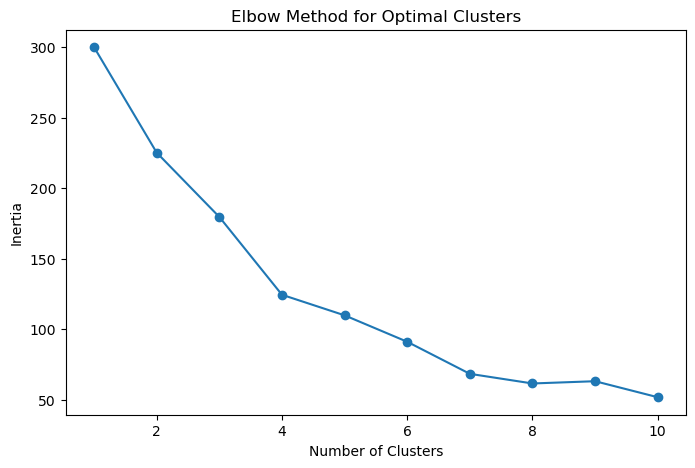

In [8]:
# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# # Based on the elbow method, choose an appropriate number of clusters.

In [9]:
# Fit the K-Means model
optimal_clusters = 3  # Adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}")

Silhouette Score for 3 clusters: 0.24


c:\Users\fdrmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# # Visualization of Clusters

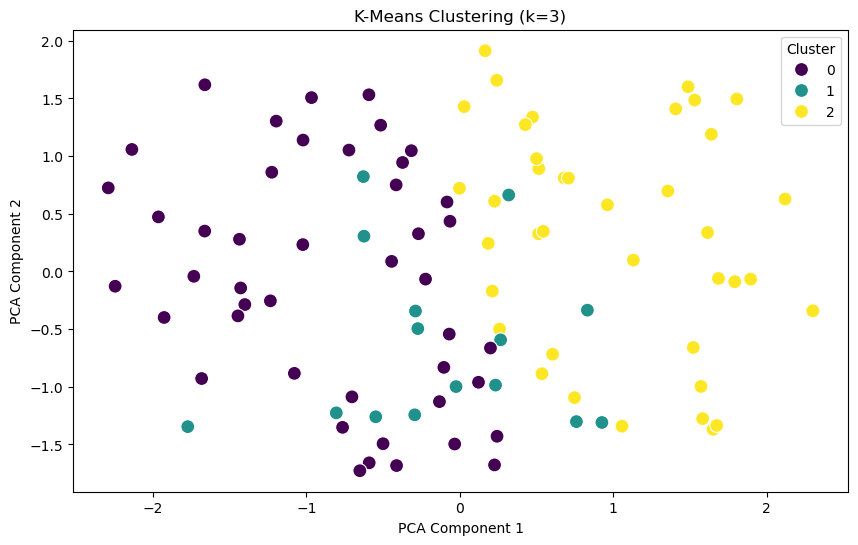

In [10]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100)
plt.title(f"K-Means Clustering (k={optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

# # Cluster Analysis

Cluster Centers:
   feature_1  feature_2  feature_3
0   7.921491   8.674435  13.863354
1   3.171325   4.700397   6.306845
2   3.740043  15.188032  17.462319


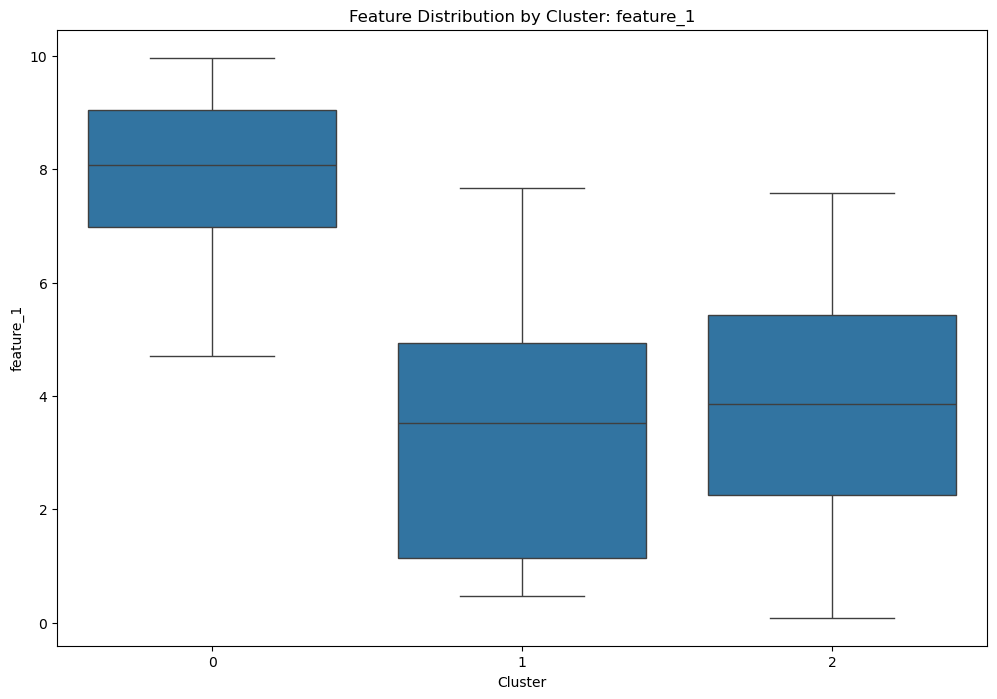

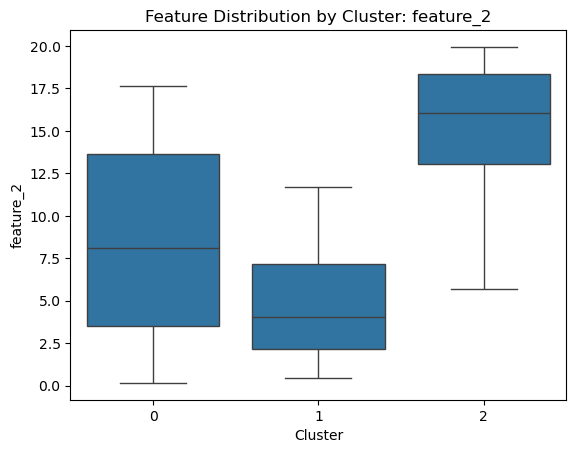

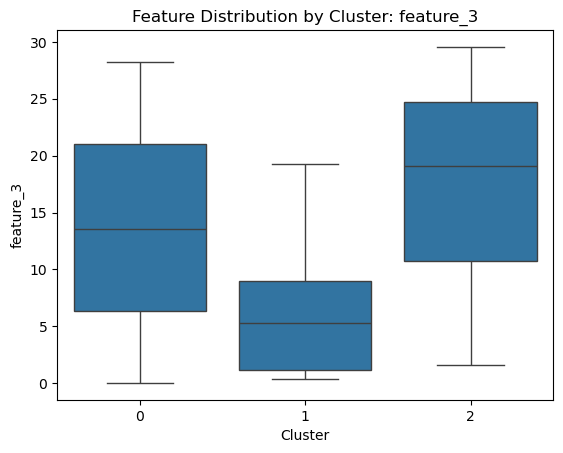

In [11]:
# Analyze the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-3])  # Adjust as needed
print("Cluster Centers:")
print(cluster_centers_df)

# Boxplot of features by cluster
plt.figure(figsize=(12, 8))
for feature in data.columns[:-3]:
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f"Feature Distribution by Cluster: {feature}")
    plt.show()

# # Save and Export Results

In [12]:
# Save clustering results to CSV
data.to_csv("kmeans_clustering_results.csv", index=False)
print("Clustering results saved to 'kmeans_clustering_results.csv'.")

Clustering results saved to 'kmeans_clustering_results.csv'.
